<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/homework-1/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Generates N random points for a given linear separator w
## if wTx > 0, y = 1; if wTx < 0, y = -1. wTx = 0 are discarded



def generate_pla(N=20, w0=0, w1=1, w2=1):
    n = 0
    data = []
    while n < N:
        x1 = random.uniform(-10, 10)
        x2 = random.uniform(-10, 10)
        y_step = w0 + w1 * x1 + w2 * x2
        if y_step == 0:
            continue
        if y_step > 0:
            label = 1
        else:
            label = -1
        data.append([1, x1, x2, label])
        n += 1
    return np.array(data)

In [56]:
f_w0, f_w1, f_w2 = 1, 1, 1
norm_coeffs = [f_w0, f_w1, f_w2]
n = 100
m=10000
data = generate_pla(n, f_w0, f_w1, f_w2)
data1 = generate_pla(m, f_w0, f_w1, f_w2)

In [57]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept) )

In [58]:
import pandas as pd

df = pd.DataFrame(data)
df.drop([0], axis = 1, inplace=True)
df.columns = ['x1', 'x2', 'y']
df['y'] = df['y'].astype('int64')
df['x0'] = 1
df = df[['x0', 'x1', 'x2', 'y']]


In [59]:
test_df = pd.DataFrame(data)
test_df.drop([0], axis = 1, inplace=True)
test_df.columns = ['x1', 'x2', 'y']
test_df['y'] = test_df['y'].astype('int64')
test_df['x0'] = 1
test_df = test_df[['x0', 'x1', 'x2', 'y']]

In [60]:
df.info()
print(df)

test_df.info()
print(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      100 non-null    int64  
 1   x1      100 non-null    float64
 2   x2      100 non-null    float64
 3   y       100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB
    x0        x1        x2  y
0    1 -4.294980 -0.737353 -1
1    1 -8.984582 -5.943249 -1
2    1  8.928908  7.280577  1
3    1  4.051435 -5.831744 -1
4    1 -2.454149 -0.572060 -1
..  ..       ...       ... ..
95   1 -9.314555  8.270924 -1
96   1 -7.261774 -0.731331 -1
97   1 -8.740519  3.534264 -1
98   1 -9.087585  1.082739 -1
99   1  5.325495  8.103776  1

[100 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      100 non-null    int64  
 1   x1      100 non-null  

In [61]:
def perceptron(points, dim, max_it=100, use_adaline=True,
               eta = 1, randomize=False, print_out = True):
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y #np.dot(w.T, x)*y
            if prod < -100: #avoid out of bound error
                st = -100
            threshold = 1 if use_adaline else 0
            st = st if use_adaline else 0
            if prod <= threshold:
                w = w + eta *(y-st)*x
                break #PLA picks one example at each iteration
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break

    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod > 0:
            c +=1
    w = w/w[-1]
    if print_out:
        print('final correctness: ', c, '. Total iteration: ', it)
        print('final normalized w:', w)
    return w, it


def plot_data(df, norm_coeffs, norm_g, lb, ub):
    x1 = np.linspace(lb, ub, 100)  # Generate x1 values for the plot
    figsize = plt.figaspect(1)
    f, ax = plt.subplots(1, 1, figsize=figsize)
    cls1_df = df.loc[df['y'] == 1]
    cls2_df = df.loc[df['y'] == -1]

    true_function = ax.plot(x1, -(norm_coeffs[0] + norm_coeffs[1] * x1), label='True Function')

    if norm_g is not None:
        final_hypothesis = ax.plot(x1, -(norm_g[0] + norm_g[1] * x1), c='r', label='Final Hypothesis')

    pluses = ax.scatter(cls1_df['x1'], cls1_df['x2'], marker='+', c='r', label='+1 labels')
    minuses = ax.scatter(cls2_df['x1'], cls2_df['x2'], marker=r'$-$', c='b', label='-1 labels')

    ax.set_ylabel(r"$x_2$", fontsize=11)
    ax.set_xlabel(r"$x_1$", fontsize=11)
    ax.set_title('Data set size = %s' % df.shape[0], fontsize=9)
    ax.axis('tight')

    legend_x = 2.0
    legend_y = 0.5
    ax.legend(['True Function', 'Final Hypothesis', '+1 labels', '-1 labels'],
              loc='center right', bbox_to_anchor=(legend_x, legend_y))

    ax.set_xlim(left=lb, right=ub)
    ax.set_ylim(bottom=lb, top=ub)

    plt.show()

# Usage example:
# Call this function with your DataFrame 'df', normalized coefficients 'norm_coeffs',
# final hypothesis coefficients 'norm_g', lower bound 'lb', and upper bound 'ub'.
# plot_data(df, norm_coeffs, norm_g, lb, ub)


Perceptron with Eta = 1.0:
final correctness:  16 . Total iteration:  999
final normalized w: [-1.47842178  1.51717876  1.        ]


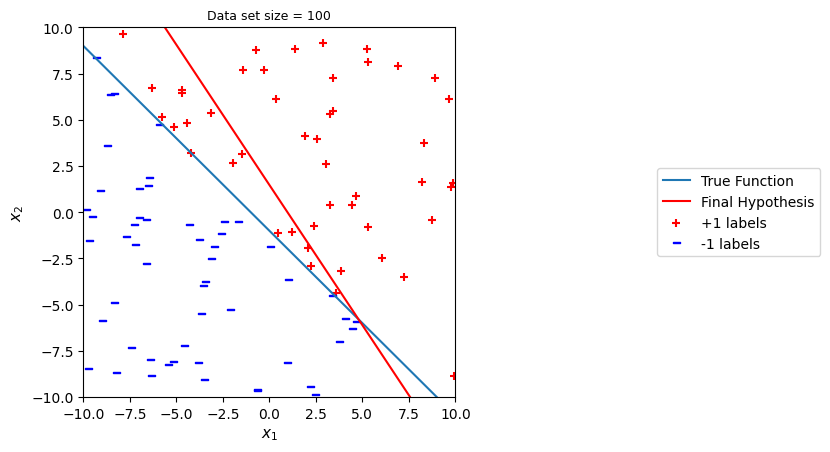


Perceptron with Eta = 0.01:
final correctness:  96 . Total iteration:  999
final normalized w: [1.06506612 1.09465585 1.        ]


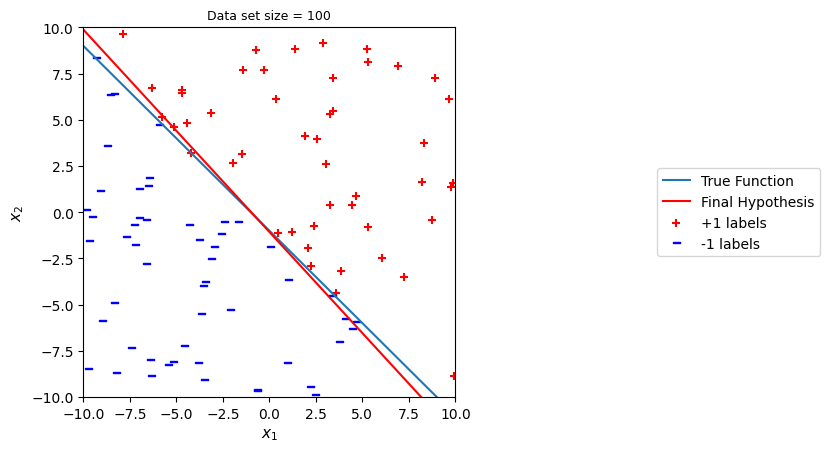


Perceptron with Eta = 0.0001:
final correctness:  93 . Total iteration:  999
final normalized w: [0.02006011 0.93079712 1.        ]


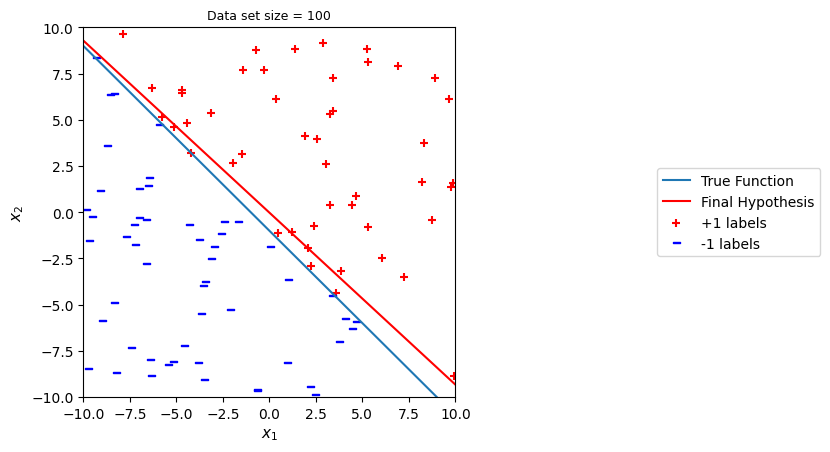

In [62]:
etas = [1.0, 0.01, 0.0001]

for eta in etas:
    print(f"Perceptron with Eta = {eta}:")
    data1 = df.to_numpy()
    w, num_iterations = perceptron(data, dim=2, max_it=1000, use_adaline=True, eta=eta, randomize=True)

    # Call plot_data with the appropriate parameters
    norm_coeffs = [f_w0, f_w1, f_w2]  # True function coefficients
    lb, ub = -10, 10  # Adjust the lower and upper bounds as needed
    plot_data(df, norm_coeffs, w, lb, ub)  # Use 'w' as the final hypothesis coefficients
    print()


final correctness:  15 . Total iteration:  999
final normalized w: [-1.41998951  1.63600589  1.        ]
True coeffs:  [1, 1, 1]


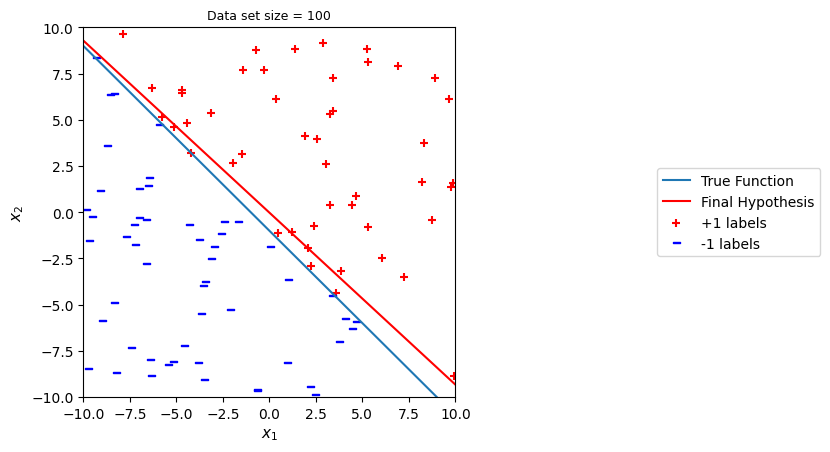

Eta =  100  Accuracy =  0.85
final correctness:  16 . Total iteration:  999
final normalized w: [-1.35815049  1.47681218  1.        ]
True coeffs:  [1, 1, 1]


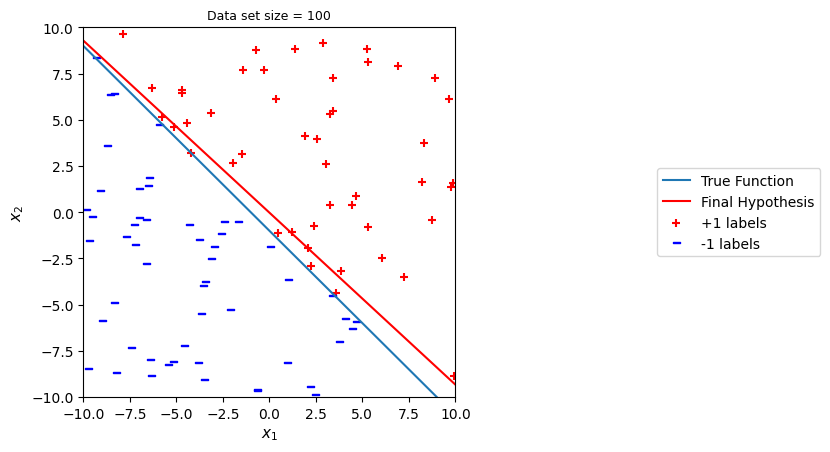

Eta =  1  Accuracy =  0.84
final correctness:  99 . Total iteration:  999
final normalized w: [1.00066494 1.03213592 1.        ]
True coeffs:  [1, 1, 1]


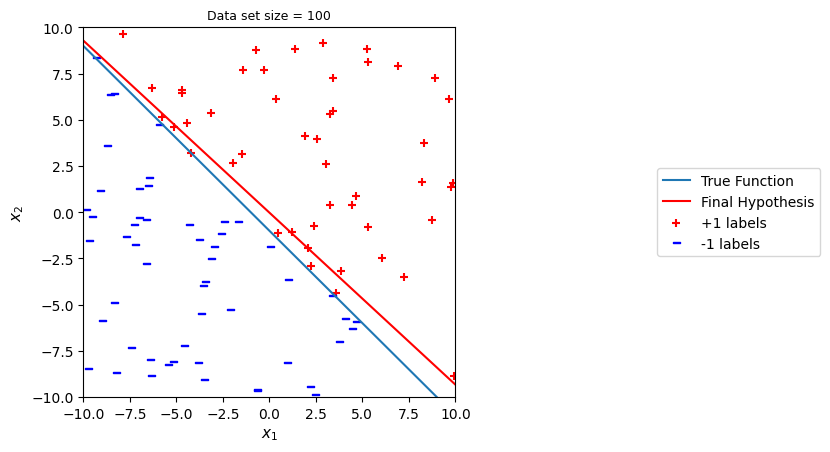

Eta =  0.01  Accuracy =  0.99
final correctness:  94 . Total iteration:  999
final normalized w: [0.05397356 0.95825775 1.        ]
True coeffs:  [1, 1, 1]


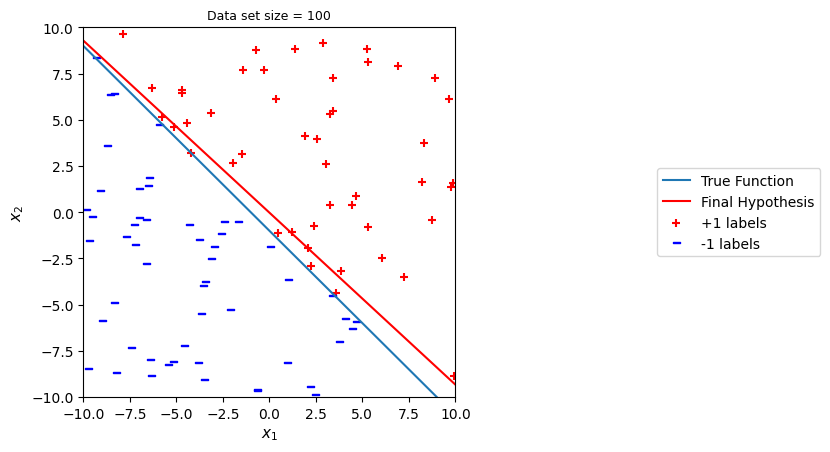

Eta =  0.0001  Accuracy =  0.94


In [65]:
for eta in [100, 1, 0.01, 0.0001]:
    norm_g, num_its = perceptron(data, dim=2, max_it=1000, use_adaline=True, eta=eta, randomize=True)
    norm_coeffs = [f_w0, f_w1, f_w2]
    print('True coeffs: ', norm_coeffs)
    lb, ub = -10, 10  # Adjust the lower and upper bounds as needed
    plot_data(df, norm_coeffs, w, lb, ub)

    xs = test_df[['x0', 'x1', 'x2']].values
    ys = test_df['y'].values
    accuracy = 0
    for x, y in zip(xs, ys):
        prod = np.dot(norm_g.T, x)*y
        if prod > 0:
            accuracy +=1
    print('Eta = ', eta, ' Accuracy = ', accuracy/100)